In [1]:
import pandas as pd
import random
import functools
import matplotlib.pyplot as plt
from abtest.utils import epsilon_greedy, thompson_sampling

In [2]:
from scipy.stats import beta
import numpy as np

In [3]:
np.random.beta(10,30)

0.32469239349111373

In [4]:
var_A ={'code': 'A', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_A.html'}
var_B ={'code': 'B', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_B.html'}
var_C ={'code': 'C', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_C.html'}

In [5]:
variants = [var_A, var_B, var_C]

In [6]:
thompson_sampling(variants)

{'code': 'B',
 'impressions': 1,
 'conversions': 1,
 'conversion_rate': 1.0,
 'html_template': 'abtest/homepage_B.html'}

In [7]:
num_A = 0
num_B = 0
num_C = 0
for i in range(1000):
    variants = [var_A, var_B, var_C]
    code = thompson_sampling(variants)['code']
    if code == 'A': 
        num_A+=1
        if random.random() < 0.41:
            var_A['impressions'] +=1
        else:
            var_A['impressions'] +=1
            var_A['conversions'] +=1
        var_A['conversion_rate'] = var_A['conversions']/var_A['impressions']
            
    if code == 'B': 
        num_B+=1
        if random.random() < 0.72:
            var_B['impressions'] +=1
        else:
            var_B['impressions'] +=1
            var_B['conversions'] +=1
        var_B['conversion_rate'] = var_B['conversions']/var_B['impressions']

    if code == 'C': 
        num_C+=1
        if random.random() < 0.81:
            var_C['impressions'] +=1
        else:
            var_C['impressions'] +=1
            var_C['conversions'] +=1
        var_C['conversion_rate'] = var_C['conversions']/var_C['impressions']

In [8]:
var_A

{'code': 'A',
 'impressions': 952,
 'conversions': 563,
 'conversion_rate': 0.5913865546218487,
 'html_template': 'abtest/homepage_A.html'}

In [9]:
var_B

{'code': 'B',
 'impressions': 35,
 'conversions': 11,
 'conversion_rate': 0.3142857142857143,
 'html_template': 'abtest/homepage_B.html'}

In [10]:
var_C

{'code': 'C',
 'impressions': 16,
 'conversions': 4,
 'conversion_rate': 0.25,
 'html_template': 'abtest/homepage_C.html'}

In [11]:
print(num_A, num_B, num_C)

951 34 15


In [12]:
def plot_beta(variants):
    x = np.linspace(0,1,200)
    for var in variants:
        y = beta.pdf(x, var['conversions'], var['impressions'] - var['conversions'])
        plt.plot(x, y)

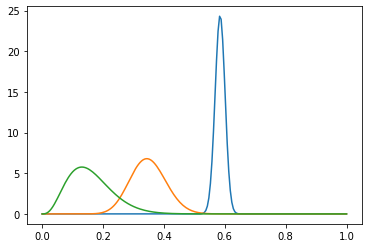

In [100]:
plot_beta([var_A, var_B, var_C])

In [186]:
random.random()

0.3592175276412729

In [192]:
random.sample([1,3,0],1)

[3]

In [160]:
import functools

def ab_campaign(func=None, campaign=None):
    template=''
    def _decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            return func(*args, template=template, **kwargs)
        return wrapper
    return _decorator

In [161]:

@ab_campaign(campaign='12311')
def hello(**kwargs):
    
    return(kwargs)

In [159]:
hello(z='ho')

{'template': '', 'z': 'ho'}